# First homework in the course - Clustering

In this homework I chose a Ski resorts dataset to demonstreate K Means clustering. 

### Business case

### Relevant questions

### Hypothesis



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn import mixture
import seaborn as sns
from clustering_tools import clustering_tools as ct

## Load the data

In [2]:
data_path = "European_Ski_Resorts.csv"
input_data = ct.load_ski_resorts_data(data_path)
input_data.head()

,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
Resort,,,,,,,,,,,,,
Alpendorf (Ski amedé),1980,740,52,30,81,4,115,22,16,11,49,75398,600
Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​Canillo/​Encamp (Grandvalira),2640,1710,47,100,77,33,210,37,28,7,72,99017,1032
Oberau (Wildschönau),1130,900,30,1,0,1,2,2,0,0,2,1932,0
Dachstein West,1620,780,42,15,33,3,51,25,8,3,36,32938,163
Rosa Khutor,2320,940,22,30,26,21,77,6,11,10,27,49228,450


# Data Preparation

I do the following steps for data preparation:

....

In [4]:

input_data_prepared, pca = ct.prepare_input_data_for_clustering(input_data, 5)
input_data_prepared

array([[-2.57540684, -1.36787726,  0.80873057, -0.58859852, -0.65231943],
       [-4.32848085,  0.40157363, -0.74404965, -0.71690153,  0.15818834],
       [ 5.39763767,  0.29728602,  0.35646594,  0.1682764 , -0.24411521],
       ...,
       [-2.49804679,  0.75413452,  0.77246381, -0.85087255,  0.68737741],
       [-2.49804679,  0.75413452,  0.77246381, -0.85087255,  0.68737741],
       [-0.57490932, -0.06369175,  0.83396708, -0.49792225, -0.51540329]])

0    234
3     86
4     35
1     12
2      9
Name: CLUSTERING_1, dtype: int64


Text(0, 0.5, 'DayPassPriceAdult')

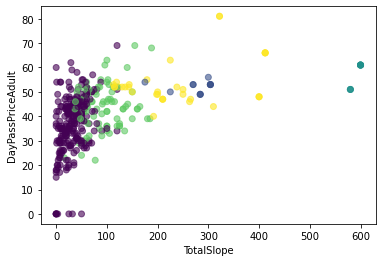

In [7]:
X = inputData.values
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
inputData["CLUSTERING_1"] = kmeans.labels_
print(inputData["CLUSTERING_1"].value_counts())
plt.scatter(
    inputData["TotalSlope"],
    inputData["DayPassPriceAdult"],
    c=inputData["CLUSTERING_1"],
    alpha=0.6,
)
plt.xlabel("TotalSlope")
plt.ylabel("DayPassPriceAdult")

/Users/petripeter/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(
/Users/petripeter/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(
/Users/petripeter/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


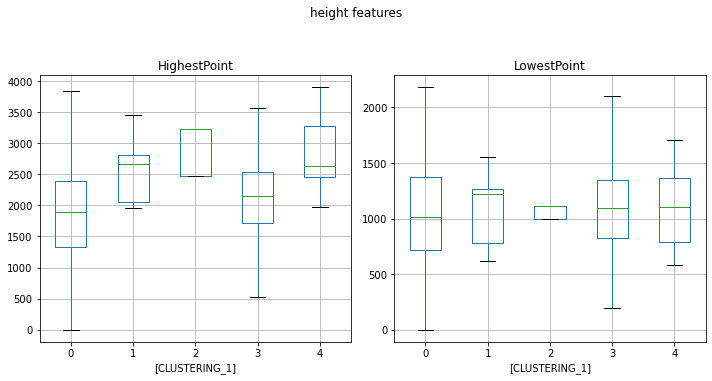

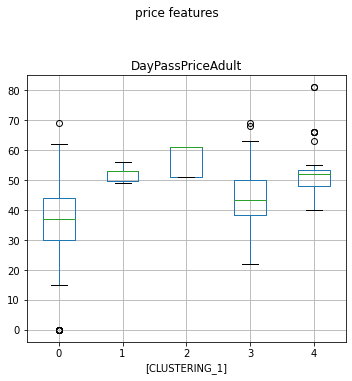

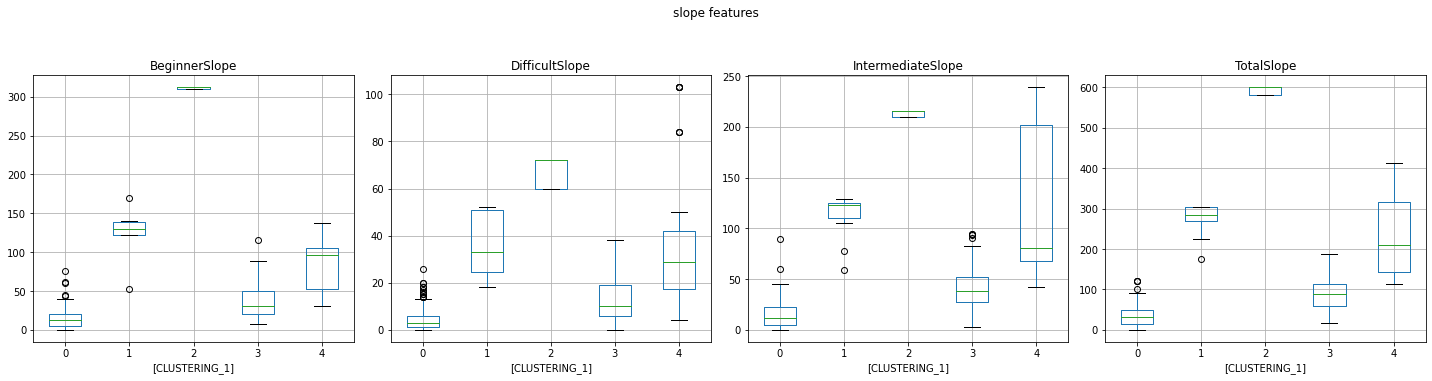

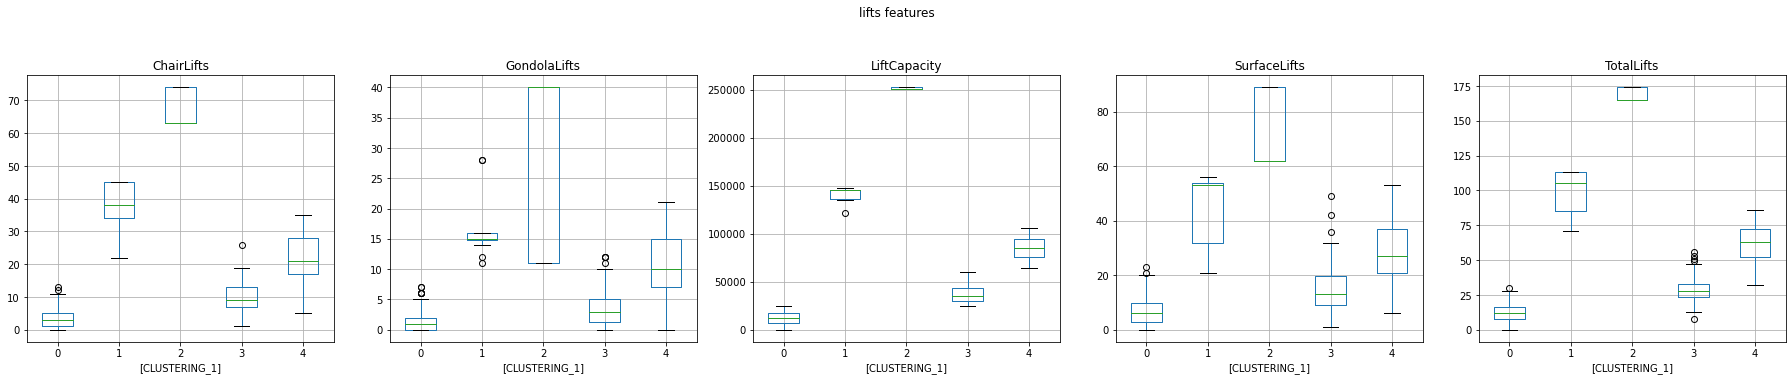

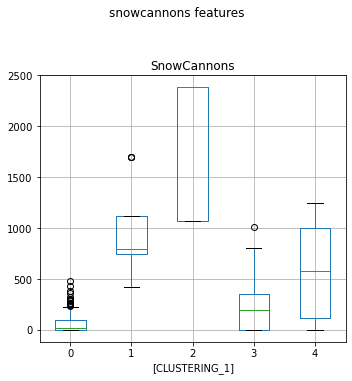

In [8]:
height_features = ["HighestPoint","LowestPoint"]
price_features = ["DayPassPriceAdult"]
slope_features =  ["BeginnerSlope", "IntermediateSlope", "DifficultSlope", "TotalSlope"]
lifts_features = ["SurfaceLifts", "ChairLifts", "GondolaLifts", "TotalLifts", "LiftCapacity"]
snowcannons_features = ["SnowCannons"]

feature_groups = {
    "height_features" : height_features,
    "price_features": price_features,
    "slope_features": slope_features,
    "lifts_features": lifts_features,
    "snowcannons_features" : snowcannons_features,
}

    
for name, group in feature_groups.items():
    ct.create_boxplot_for_feature_group(group,name,inputData)

In [9]:
inputData.drop("CLUSTERING_1", inplace = True, axis = 1)
inputDataNormalized = (inputData-inputData.mean())/inputData.std()
inputDataNormalized.head()

,HighestPoint,LowestPoint,DayPassPriceAdult,BeginnerSlope,IntermediateSlope,DifficultSlope,TotalSlope,SurfaceLifts,ChairLifts,GondolaLifts,TotalLifts,LiftCapacity,SnowCannons
Resort,,,,,,,,,,,,,
Alpendorf (Ski amedé),-0.092297,-0.743851,0.899512,-0.109265,0.858334,-0.437237,0.252699,0.577461,0.528736,1.073080,0.710158,0.885012,0.937909
Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​Canillo/​Encamp (Grandvalira),0.757430,1.546022,0.498687,1.193792,0.777837,1.193279,1.087935,1.616339,1.481473,0.463827,1.451162,1.398971,1.999585
Oberau (Wildschönau),-1.186642,-0.366140,-0.864120,-0.649103,-0.771735,-0.605911,-0.740793,-0.807709,-0.741581,-0.602367,-0.804068,-0.713638,-0.536642
Dachstein West,-0.555784,-0.649423,0.097861,-0.388491,-0.107633,-0.493461,-0.309987,0.785237,-0.106423,-0.145427,0.291329,-0.038935,-0.136056
Rosa Khutor,0.345441,-0.271712,-1.505441,-0.109265,-0.248503,0.518583,-0.081396,-0.530675,0.131762,0.920767,0.001371,0.315542,0.569271


Text(0, 0.5, 'DayPassPriceAdult')

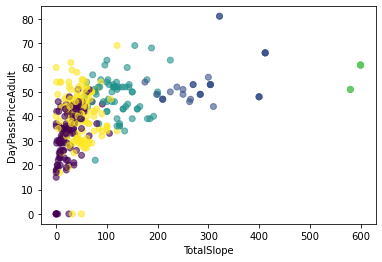

In [10]:
X = inputDataNormalized.values
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(X)
inputData["CLUSTERING_1"] = kmeans.labels_
inputData["CLUSTERING_1"].value_counts()
plt.scatter(inputData["TotalSlope"],inputData["DayPassPriceAdult"],c=inputData["CLUSTERING_1"],alpha=0.6)
plt.xlabel("TotalSlope")
plt.ylabel("DayPassPriceAdult")

In [11]:
X_PCA=(X_PCA-X_PCA.mean())/X_PCA.std()

kmeans = KMeans(n_clusters=5, random_state=0,max_iter=3000).fit(X_PCA)

inputDataNormalized["CLUSTERING_1"]=kmeans.labels_
inputDataNormalized["CLUSTERING_1"].value_counts()

[0.69380617 0.13063775 0.05576829 0.04061538 0.0293185 ]


4    140
0    130
2     66
1     31
3      9
Name: CLUSTERING_1, dtype: int64

In [12]:
principal_components=pd.DataFrame(pca.components_,index=np.arange(5),columns=feature_columns).transpose()
principal_components

,0,1,2,3,4
HighestPoint,0.170803,-0.614825,0.020878,-0.030831,-0.146493
LowestPoint,0.049878,-0.679816,0.437753,-0.073822,0.104723
DayPassPriceAdult,0.187930,-0.287023,-0.787664,-0.112550,0.453167
BeginnerSlope,0.314055,0.084221,0.163358,-0.054332,0.070704
IntermediateSlope,0.306268,-0.026274,-0.104321,0.302069,-0.191958
DifficultSlope,0.284989,-0.046733,-0.096385,0.562508,-0.328261
TotalSlope,0.326409,0.021018,0.016462,0.193884,-0.101364
SurfaceLifts,0.291659,0.156970,0.180571,0.161430,0.491592
ChairLifts,0.313903,0.077988,0.169124,-0.032028,0.174925
GondolaLifts,0.287684,0.037139,-0.230818,-0.323985,-0.515627


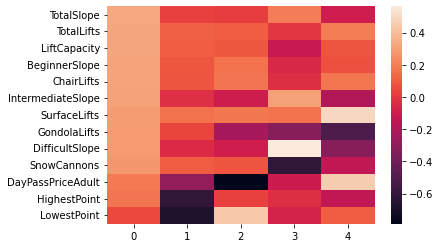

In [13]:
import seaborn as sns
ax = sns.heatmap(principal_components.sort_values(0,ascending=False))

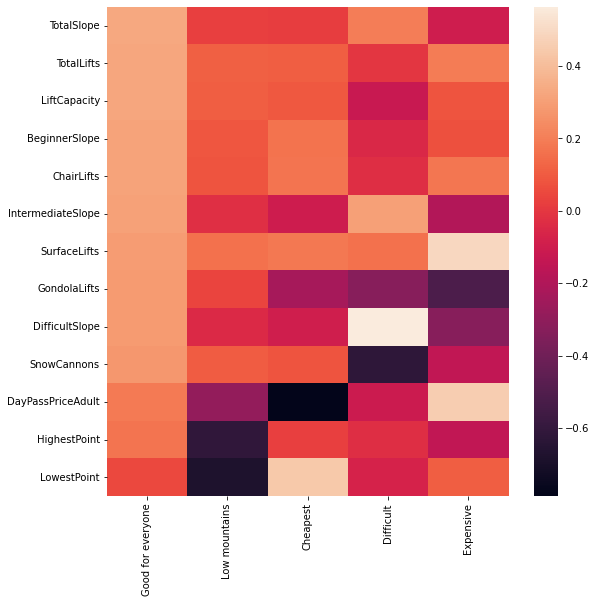

In [14]:
#lets name components!
component_names=["Good for everyone","Low mountains","Cheapest","Difficult","Expensive"]
principal_components.columns=component_names
fig,axes=plt.subplots(1,1,figsize=(9,9))
axes = sns.heatmap(principal_components.sort_values("Good for everyone",ascending=False),ax=axes)

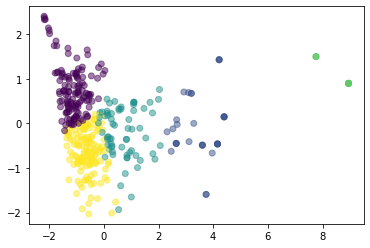

In [15]:
inputDataNormalizedFactorized=pd.DataFrame(X_PCA, columns=component_names)
inputDataNormalizedFactorized["CLUSTERING_1"]=kmeans.labels_
plt.scatter(inputDataNormalizedFactorized["Good for everyone"],
            inputDataNormalizedFactorized["Low mountains"],c=inputDataNormalizedFactorized["CLUSTERING_1"],alpha=0.5)


In [16]:
inputData.drop("CLUSTERING_1",inplace=True,axis=1)

In [17]:
inputData.skew()

HighestPoint        -0.341316
LowestPoint         -0.075609
DayPassPriceAdult   -0.505224
BeginnerSlope        3.520913
IntermediateSlope    2.418324
DifficultSlope       2.968581
TotalSlope           2.775542
SurfaceLifts         2.440496
ChairLifts           2.877420
GondolaLifts         3.348735
TotalLifts           2.798421
LiftCapacity         2.992235
SnowCannons          3.241244
dtype: float64

In [18]:
#from this we cansee that we still didnt find the right function  form
#exponentially distributed features must be LOGnormalized in order to get good separation
#select exponentially distributed features
    

BeginnerSlope
IntermediateSlope
DifficultSlope
TotalSlope
SurfaceLifts
ChairLifts
GondolaLifts
TotalLifts
LiftCapacity
SnowCannons


In [19]:
inputData.skew()

HighestPoint        -0.341316
LowestPoint         -0.075609
DayPassPriceAdult   -0.505224
BeginnerSlope       -0.262894
IntermediateSlope   -0.412758
DifficultSlope       0.148220
TotalSlope          -0.707928
SurfaceLifts        -0.193025
ChairLifts           0.221492
GondolaLifts         0.573024
TotalLifts          -0.289173
LiftCapacity        -3.231996
SnowCannons         -0.131585
dtype: float64

In [20]:
inputData.replace(np.nan,0,inplace=True)

In [21]:
#and now we can do the correct analysis
#step 1: logarithm
#step 2:  standardize
inputDataNormalized=(inputData-inputData.mean())/inputData.std()
inputData=(inputData-inputData.mean())/inputData.std()

#step 3: PCA

pca = PCA(n_components=5)
pca.fit(inputDataNormalized.values)
print(pca.explained_variance_ratio_)
X_PCA=pca.fit_transform(inputDataNormalized[feature_columns].values)
X_PCA=(X_PCA-X_PCA.mean())/X_PCA.std()

kmeans = KMeans(n_clusters=5, random_state=0,max_iter=3000).fit(X_PCA)

inputDataNormalized["CLUSTERING_1"]=kmeans.labels_
inputDataNormalized["CLUSTERING_1"].value_counts()

[0.63639866 0.10921101 0.06374391 0.05531055 0.03625547]


0    149
4     91
2     71
1     57
3      8
Name: CLUSTERING_1, dtype: int64

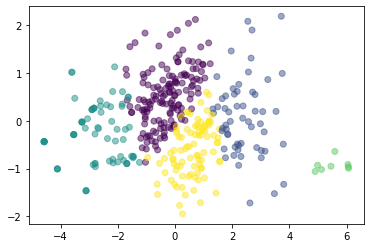

In [22]:
inputDataNormalizedFactorized=pd.DataFrame(X_PCA,columns=component_names)
inputDataNormalizedFactorized["CLUSTERING_1"]=kmeans.labels_
inputDataNormalized["CLUSTERING_1"]=kmeans.labels_

plt.scatter(inputDataNormalizedFactorized["Good for everyone"],
            inputDataNormalizedFactorized["Low mountains"],c=inputDataNormalizedFactorized["CLUSTERING_1"],alpha=0.5)



/Users/petripeter/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(
/Users/petripeter/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(
/Users/petripeter/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/boxplot.py:394: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  ax = boxplot(


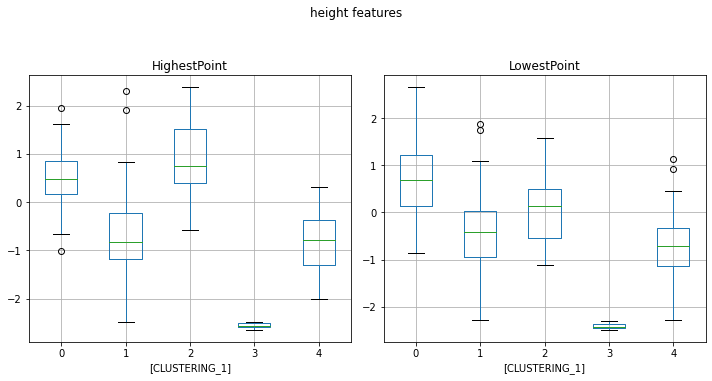

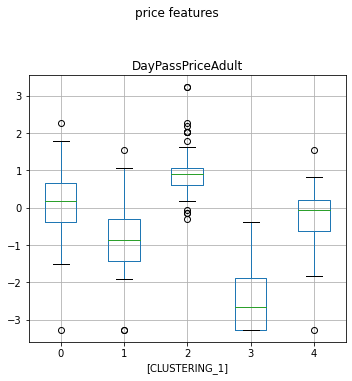

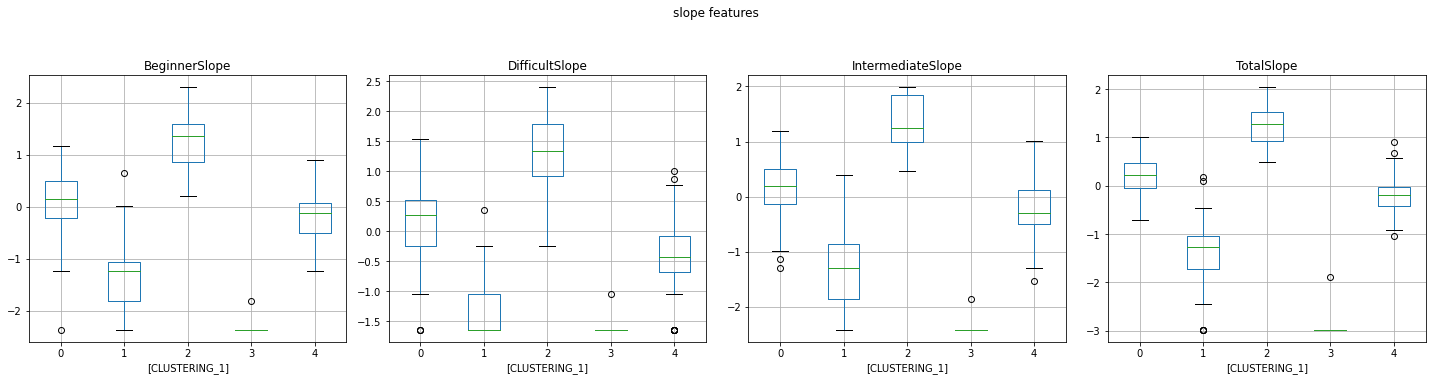

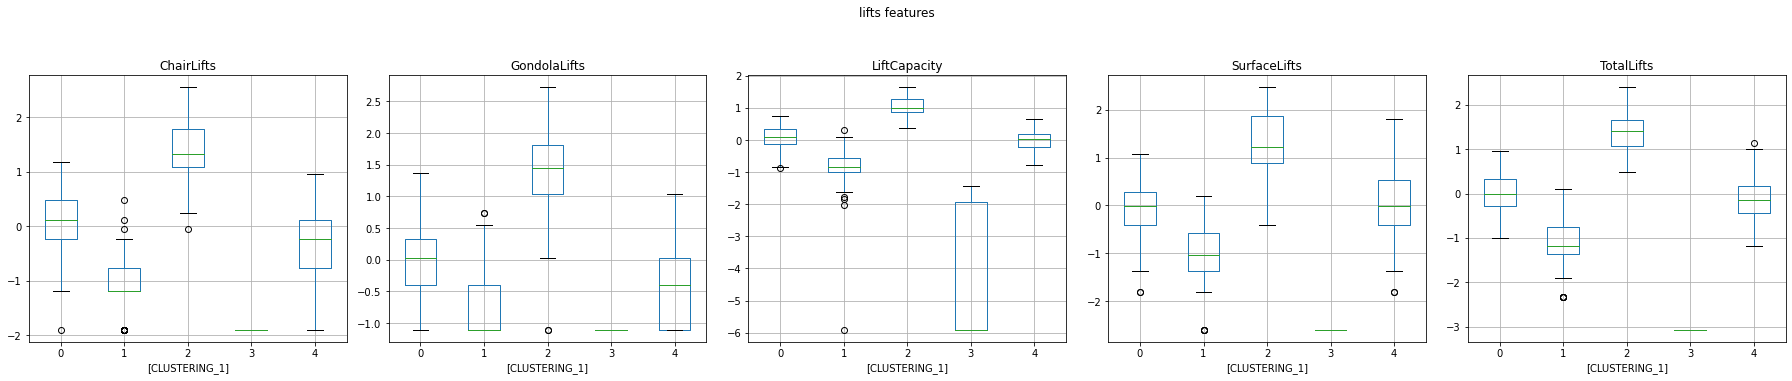

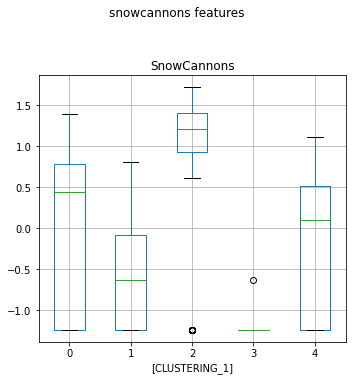

In [23]:
for name, group in feature_groups.items():
    create_boxplot_for_feature_group(group,name,inputDataNormalized)

### Cluster 0 - Average
+ az átlagnál valamivel magasabban fekvő
+ árban átlagos
+ átlagos mennyiségű pálya
+ átlagos a felvonók szemponjából
+ hóágyúk száma átlagos

### Cluster 1 - Gyengébb minőségű
+ alacsony fekvésű
+ átlagosnál olcsóbb
+ kevesebb a pálya
+ kevés felvonó
+ kevés hóágyú

### Cluster 2 - Deluxe
+ magasan fekvő
+ viszonylag drága
+ sok pálya
+ sok felvonó
+ sok hóágyú

### Cluster 3 - Low grade
+ legalacsonyabb fekvésű
+ legolcsóbb
+ legkevesebb pálya
+ legkevesebb felvonó
+ legkevesebb hóágyú

### Cluster 4 - Average low grade
+ alacsony fekvésű
+ árban átlagos
+ átlagos mennyiségű pálya
+ átlagos mennyiségű felvonó
+ átlagos - kevés hóágyú